<a href="https://colab.research.google.com/github/BirenderPanwar/EVA4_Phase1/blob/master/session15/assignment_A/EVAS15_dataset_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 14_15: Dataset Statistics

1. Dataset kinds and its count
2. Each dataset size
3. Each dataset visualization
4. Mean calculation for dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import torch
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 CPU


In [0]:
import os
import time
import numpy as np
import pandas as pd
import shutil
from tqdm import tqdm
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

import zipfile
from io import BytesIO

import matplotlib.pyplot as plt
%matplotlib inline

## Initialize dataset locations and get zip resources

In [0]:
# initialize dataset locations
root_dataset = "/content/gdrive/My Drive/TSAI/EVA_Phase1/session14_15/s15_assignment_A/dataset"

bg_zipfile_name = f'{root_dataset}/bg_images.zip'                       # background images location
fg_zipfile_name = f'{root_dataset}/fg_images.zip'                       # foreground images location
fg_mask_zipfile_name = f'{root_dataset}/fg_mask_images.zip'             # forground mask images location
fg_bg_zipfile_name = f'{root_dataset}/fg_bg_images.zip'                 # forground-background overlay images location
fg_bg_mask_bg_zipfile_name = f'{root_dataset}/fg_bg_mask_images.zip'    # forground-background overlay mask images location
fg_bg_depth_zipfile_name = f'{root_dataset}/fg_bg_depth_images.zip'     # forground-background depth images location

In [0]:
# get zip resources
zf_bg = zipfile.ZipFile(bg_zipfile_name, 'r')
zf_fg = zipfile.ZipFile(fg_zipfile_name, 'r')
zf_fg_mask = zipfile.ZipFile(fg_mask_zipfile_name, 'r')
zf_fg_bg = zipfile.ZipFile(fg_bg_zipfile_name, 'r')
zf_fg_bg_mask = zipfile.ZipFile(fg_bg_mask_bg_zipfile_name, 'r')
zf_fg_bg_depth = zipfile.ZipFile(fg_bg_depth_zipfile_name, 'r')

### Count for each kind of dataset

In [6]:
datasets = [["bg", len(zf_bg.namelist())],
            ["fg", len(zf_fg.namelist())],
            ["fg_mask", len(zf_fg_mask.namelist())],
            ["fg_bg", len(zf_fg_bg.namelist())],
            ["fg_bg_mask", len(zf_fg_bg_mask.namelist())],
            ["fg_bg_depth", len(zf_fg_bg_depth.namelist())]]

df = pd.DataFrame(data=datasets, columns=["Kinds", "Total Images"])
df

,Kinds,Total Images
0,bg,100
1,fg,100
2,fg_mask,100
3,fg_bg,400000
4,fg_bg_mask,400000
5,fg_bg_depth,400000


## Visualize all kind of dataset

In [0]:
def read_image_from_zip(zf, filename):
    data = zf.read(filename)
    dataEnc = BytesIO(data)
    img = Image.open(dataEnc)
    return img
		
def load_images_from_zip(zf, im_files):
    load_images = []
    for file in im_files:
      img = read_image_from_zip(zf, file)
      load_images.append(img)

    #return np.stack(load_images, axis=0)
    return load_images

In [11]:
# filename for 10 different foreground and background images
randnums= np.random.randint(1,101,10)
img_files = [f'img_{idx:03d}.jpg' for idx in randnums]
overlay_files = [f'fg{idx:03d}_bg{idx:03d}_01.jpg' for idx in randnums]
print("Random filename choosen for bg, fg, fg_mask: \n", img_files)
print("\nRandom filename choosen for fg_bg, fg_bg_mask, fg_bg_depth: \n", overlay_files)

Random filename choosen for bg, fg, fg_mask: 
 ['img_050.jpg', 'img_050.jpg', 'img_060.jpg', 'img_027.jpg', 'img_055.jpg', 'img_030.jpg', 'img_093.jpg', 'img_034.jpg', 'img_100.jpg', 'img_080.jpg']

Random filename choosen for fg_bg, fg_bg_mask, fg_bg_depth: 
 ['fg050_bg050_01.jpg', 'fg050_bg050_01.jpg', 'fg060_bg060_01.jpg', 'fg027_bg027_01.jpg', 'fg055_bg055_01.jpg', 'fg030_bg030_01.jpg', 'fg093_bg093_01.jpg', 'fg034_bg034_01.jpg', 'fg100_bg100_01.jpg', 'fg080_bg080_01.jpg']


In [0]:
# load image data
bg_data = load_images_from_zip(zf_bg, img_files)
fg_data = load_images_from_zip(zf_fg, img_files)
fg_mask_data = load_images_from_zip(zf_fg_mask, img_files)
fg_bg_data = load_images_from_zip(zf_fg_bg, overlay_files)
fg_bg_mask_data = load_images_from_zip(zf_fg_bg_mask, overlay_files)
fg_bg_depth_data = load_images_from_zip(zf_fg_bg_depth, overlay_files)

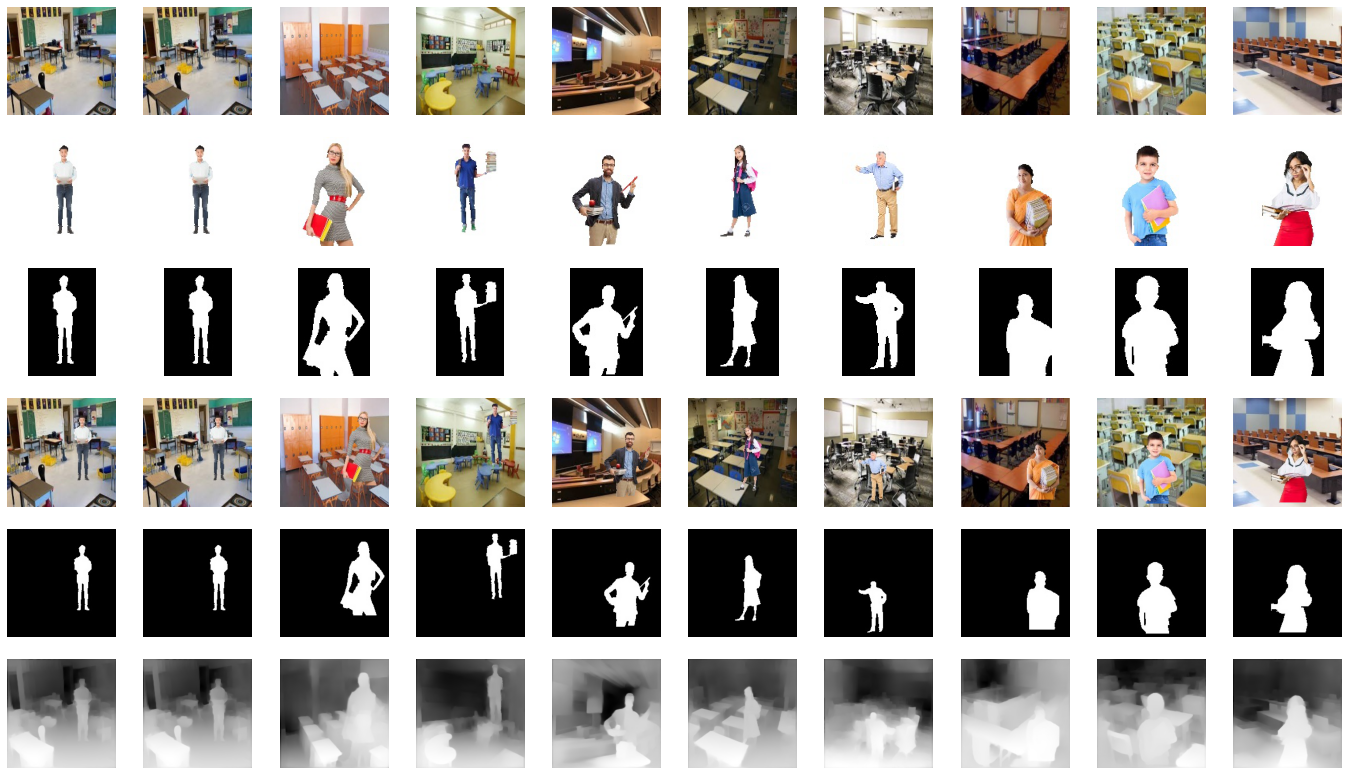

In [13]:
plt.figure(figsize=(24,14)) 

for i in np.arange(10): 
    plt.subplot(6,10,i+1),plt.imshow(bg_data[i])
    plt.axis('off')

for i in np.arange(10):
    plt.subplot(6,10, i+11),plt.imshow(fg_data[i])
    plt.axis('off')

for i in np.arange(10):
    plt.subplot(6,10, i+21),plt.imshow(fg_mask_data[i].convert('LA'))
    plt.axis('off')

for i in np.arange(10):
    plt.subplot(6,10, i+31),plt.imshow(fg_bg_data[i])
    plt.axis('off')

for i in np.arange(10):
    plt.subplot(6,10, i+41),plt.imshow(fg_bg_mask_data[i])
    plt.axis('off')

for i in np.arange(10):
    plt.subplot(6,10, i+51),plt.imshow(fg_bg_depth_data[i].convert('LA'))
    plt.axis('off')

plt.savefig("dataset_visual.jpg")
plt.show()


## Dataset size for each kind

In [0]:
def get_dataset_size(zf):
  datasize = sum([zinfo.file_size for zinfo in  zf.filelist])
  return np.round(datasize / 1e+6, 3)

In [0]:
bg_size = get_dataset_size(zf_bg)
fg_size = get_dataset_size(zf_fg)
fg_mask_size = get_dataset_size(zf_fg_mask)
fg_bg_size = get_dataset_size(zf_fg_bg)
fg_bg_mask_size = get_dataset_size(zf_fg_bg_mask)
fg_bg_depth_size = get_dataset_size(zf_fg_bg_depth)

In [0]:
df["Total Size (MB)"] = [bg_size, fg_size, fg_mask_size, fg_bg_size, fg_bg_mask_size, fg_bg_depth_size]

,Kinds,Total Images,Total Size (MB)
0,bg,100,1.888
1,fg,100,0.456
2,fg_mask,100,0.289
3,fg_bg,400000,7941.210
4,fg_bg_mask,400000,1508.193
5,fg_bg_depth,400000,3237.788


## Mean/STD calculations for dataset

In [0]:
'''
calculating mean for 400K dataset by load all the images need high amout of RAM.
so mean is calculated in batches. inividual batch means is used to find the net mean of entire dataset
'''
def calc_means(zf, img_size=192, channels=3):
    
    num_images = len(zf.namelist())
    file_list = zf.namelist()
    cnt = 0
    
    means = [0,0,0]
    stdevs = []   

    b_size = 1000
    b_cnt = num_images // b_size

    for i in np.arange(b_cnt):   
        # load images     
        img_data = np.zeros((b_size, img_size, img_size, channels), dtype='float32')
        for k in np.arange(b_size):
            filename = file_list[b_size*i+k]
            im = read_image_from_zip(zf, filename)
            if channels == 1:
              img_data[k] = np.expand_dims(im, axis=2)
            else:
              img_data[k] = im

        # calculate mean for this batch of images
        cur_means = [0,0,0]
        cur_stdevs = []
        for c in np.arange(channels): 
            pixels = img_data[:,:,:,c].ravel()
            cur_means[c] = np.mean(pixels)
            #cur_stdevs.append(np.round(np.std(pixels),2))

        del img_data
        
        # net mean till this batch 
        for c in np.arange(channels):
            total_pixels = img_size*b_size*(i+1)
            pixel_sum = means[c]*img_size*b_size*i + cur_means[c]*img_size*b_size
            means[c] = pixel_sum / total_pixels 
    return np.round(means,2)

In [0]:
# calculate mean for fg_bg dataset
fg_bg_means = calc_means(zf_fg_bg, img_size=192, channels=3)
print("fg_bg dataset: Means = ", fg_bg_means)

fg_bg dataset: Means =  [142.86 130.   117.22]


In [0]:
# calculate mean for fg_bg_mask dataset
fg_bg_mask_means = calc_means(zf_fg_bg_mask, img_size=192, channels=3)
print("fg_bg_mask dataset: Mean = ", fg_bg_mask_means[0])

fg_bg_mask dataset: Mean =  23.26


In [0]:
# calculate mean for fg_bg_depth dataset
fg_bg_depth_means = calc_means(zf_fg_bg_depth, img_size=240, channels=1)
print("fg_bg_depth dataset: Mean: ", fg_bg_depth_means[0])

fg_bg_depth dataset: Mean:  147.46


In [0]:
df["Image Dimension"] = [(192,192), "size of an object in image", "same as fg image", (192,192),(192,192),(240,240)]
df["Channels"] = [3, 3, 1, 3, 1, 1]

In [0]:
df["Means"] = [np.nan, np.nan, np.nan, fg_bg_means,fg_bg_mask_means[0],fg_bg_depth_means[0]]
df

,Kinds,Total Images,Total Size (MB),Image Dimension,Channels,Means
0,bg,100,1.888,"(192, 192)",3,NaN
1,fg,100,0.456,size of an object in image,3,NaN
2,fg_mask,100,0.289,same as fg image,1,NaN
3,fg_bg,400000,7941.210,"(192, 192)",3,"[142.86, 130.0, 117.22]"
4,fg_bg_mask,400000,1508.193,"(192, 192)",1,23.26
5,fg_bg_depth,400000,3237.788,"(240, 240)",1,147.46


## Important: release all resources

In [0]:
# close the zip file resource
zf_bg.close()
zf_fg.close()
zf_fg_mask.close()
zf_fg_bg.close()
zf_fg_bg_mask.close()
zf_fg_bg_depth.close()